In [1]:
import numpy as np
import pandas as pd
from functools import reduce
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Merge datasets

In [7]:
fermented = pd.read_csv('../data/Fermented.csv').replace('-', 0 )
cheesy = pd.read_csv('../data/Cheesy.csv').replace('-', 0 )
milky = pd.read_csv('../data/Milky.csv').replace('-', 0 )
fruity = pd.read_csv('../data/Fruity.csv').replace('-', 0 )

In [8]:
# df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Sample'],
#                                             how='outer'), [fermented,cheesy,milky,fruity ])
# df_merged = df_merged.fillna(0)
# compounds = [ x  for x in list(df_merged['Sample']) if x!= 'Label' ]
# df_merged = df_merged.set_index(['Sample'])
# df_merged = df_merged.T
# df_merged = df_merged[ compounds + ['Label']]
# df_merged.index.names = ['index']
# df_merged = df_merged.rename(columns={'Sample': 'index'})
# samples = list(df_merged.index)
# df_merged = df_merged.reset_index().drop(['index'],axis=1)
# df_merged['Sample'] = samples
# df_merged = df_merged[ ['Sample'] + compounds + ['Label']]
# df_merged.to_csv('../data/Merged.csv',index=None)

In [2]:
df_merged = pd.read_csv('../data/Merged.csv')
df_merged.head()

,Sample,Acetaldehyde,"2,3-Butanedione","2,3-Pentanedione",2-Heptanone,3-Hydroxy-2-butanone,1-Hexanol,Dimethyl trisulfide,2-Nonanone,Acetic acid,...,Dimethyl sulfone,Heptanoic acid,Phenol,Octanoic acid,Nonanoic acid,delta-Decalactone,Decanoic acid,Ethyl acetate,Acetoin,Label
0,S01_1,0.000000,4759.377435,0.000000,0.000000,10314.338680,0.000000,0.0,43.713108,20870.83696,...,0.000000,468.248465,0.000000,579.264433,657.148532,52.493293,769.289225,0.0,0.0,Fermented
1,S01_2,175.678662,0.000000,245.184336,19.793842,8973.718394,8.747135,0.0,40.830214,12410.18980,...,0.000000,467.590717,4.499179,720.219120,0.000000,36.644951,797.585066,0.0,0.0,Fermented
2,S01_3,39.771663,4076.815137,0.000000,0.000000,11026.299710,9.050112,0.0,0.000000,16725.86066,...,3512.368297,468.160536,5.642994,697.415010,657.435742,82.377589,834.719861,0.0,0.0,Fermented
3,S12_1,93.677511,2054.903717,0.000000,26.785561,12404.010240,0.000000,0.0,38.103403,31289.57444,...,2186.896167,694.390641,0.000000,4276.357165,748.514095,85.056011,4682.549658,0.0,0.0,Fermented
4,S12_2,352.146773,1441.210308,0.000000,0.000000,23850.622210,0.000000,0.0,42.444187,89363.27943,...,0.000000,722.503200,0.000000,4935.870446,735.619714,103.920625,5240.778609,0.0,0.0,Fermented


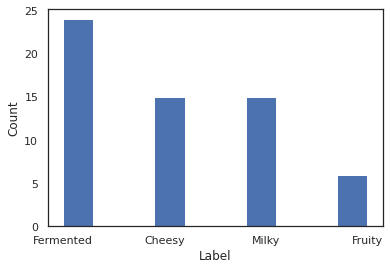

In [5]:
sns.set_theme(style="white")
plt.hist(df_merged['Label'])
plt.ylabel('Count')
plt.xlabel('Label')
# plt.savefig('../Figures/data_hist.svg',format='svg',dpi=150)

# PCA

In [6]:
X = df_merged.iloc[:,1:-1].values
X = StandardScaler().fit_transform(X)

In [7]:
pca_transform = PCA(n_components=3)
X_pca = pca_transform.fit_transform(X)
print(pca_transform.explained_variance_ratio_)

[0.29029396 0.12680221 0.08231512]


In [8]:
X_pca_pd = pd.DataFrame(X_pca, columns=['PC1(29.0%)','PC2(12.7%)','PC3(8.2%)'])
X_pca_pd['Label'] = list(df_merged['Label'])

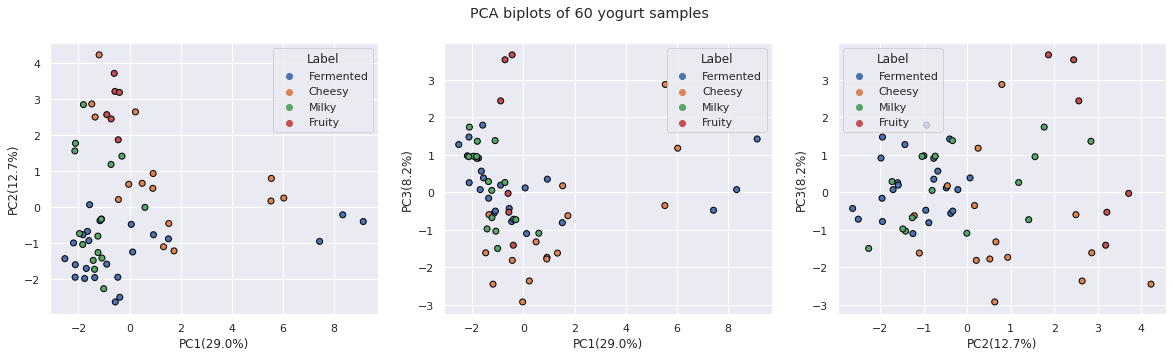

In [31]:
sns.set_theme(style="darkgrid")
hue_order = ['Fermented','Cheesy','Milky','Fruity']
f, axs = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(x='PC1(29.0%)', y='PC2(12.7%)',hue="Label",
                hue_order=hue_order,linewidth=1,data=X_pca_pd, edgecolor='black', ax=axs[0])
sns.scatterplot(x="PC1(29.0%)", y="PC3(8.2%)",hue="Label",
                hue_order=hue_order,linewidth=1,data=X_pca_pd,edgecolor='black',  ax=axs[1])
sns.scatterplot(x="PC2(12.7%)", y="PC3(8.2%)",hue="Label",
                hue_order=hue_order,linewidth=1,data=X_pca_pd, edgecolor='black', ax=axs[2])
plt.suptitle('PCA biplots of 60 yogurt samples')
plt.savefig('../Figures/pca.svg',format='svg',dpi=150)

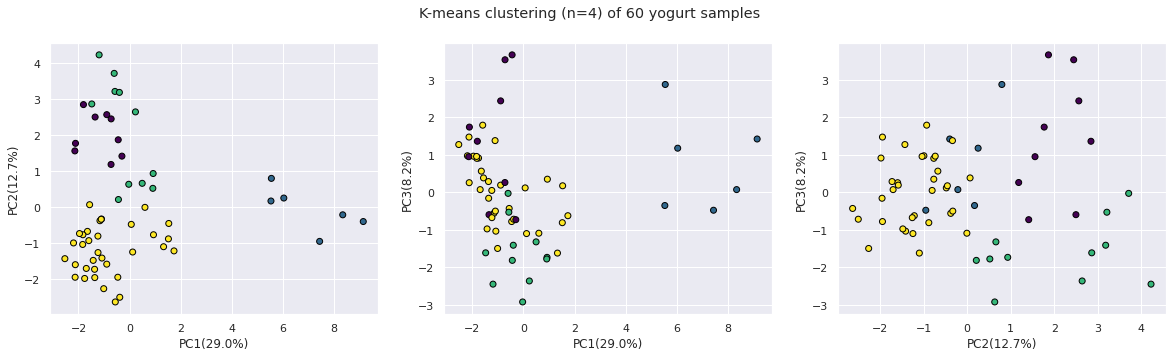

In [32]:
sns.set_theme(style="darkgrid")
y_pred = KMeans(n_clusters=4, random_state=42 ).fit_predict(X)
f, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].scatter(X_pca_pd['PC1(29.0%)'], X_pca_pd['PC2(12.7%)'], c=y_pred,edgecolors='black', cmap='viridis')
axs[1].scatter(X_pca_pd['PC1(29.0%)'], X_pca_pd['PC3(8.2%)'], c=y_pred,edgecolors='black', cmap='viridis')
axs[2].scatter(X_pca_pd['PC2(12.7%)'], X_pca_pd['PC3(8.2%)'], c=y_pred,edgecolors='black', cmap='viridis')
plt.suptitle('K-means clustering (n=4) of 60 yogurt samples')
axs[0].set_xlabel('PC1(29.0%)')
axs[1].set_xlabel('PC1(29.0%)')
axs[2].set_xlabel('PC2(12.7%)')
axs[0].set_ylabel('PC2(12.7%)')
axs[1].set_ylabel('PC3(8.2%)')
axs[2].set_ylabel('PC3(8.2%)')
plt.savefig('../Figures/kmeans.svg',format='svg',dpi=150)

Text(0.5, 1.0, 'Standardized')

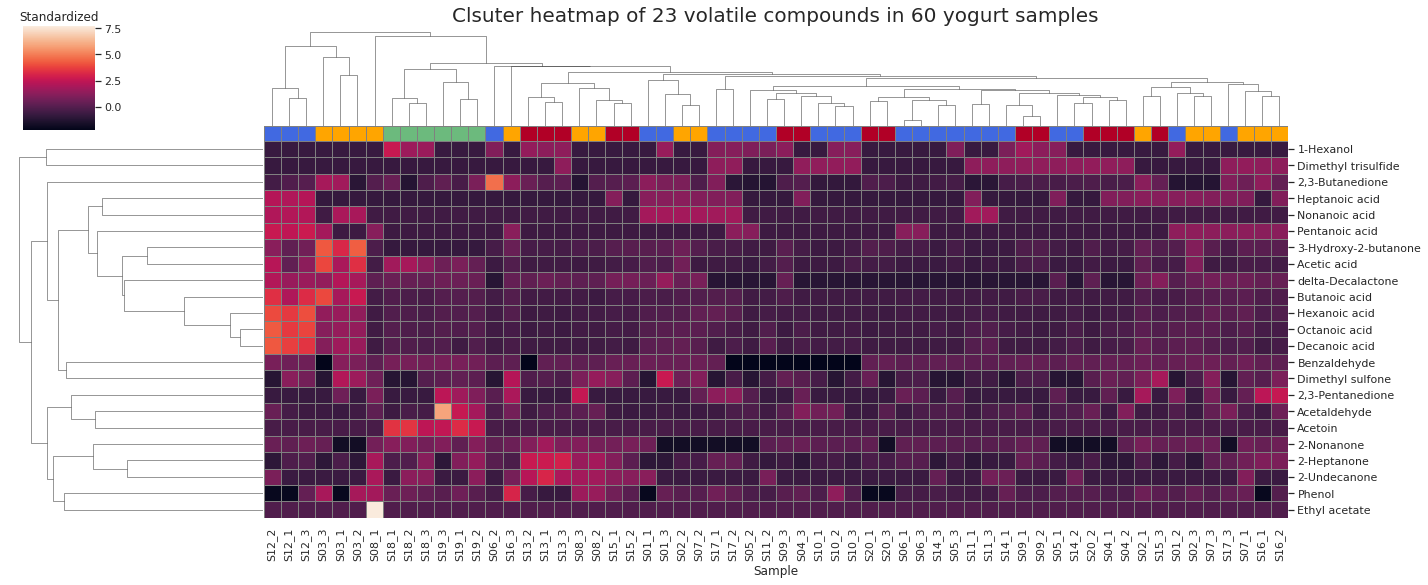

In [21]:
samples = list(df_merged['Sample'])
cols = [ x  for x in list(df_merged.columns) if (x!= 'Label' )and( x!= 'Sample') ]
temp_pd = pd.DataFrame(X, columns=cols)
temp_pd['Sample'] = samples
temp_pd = temp_pd.set_index(['Sample'])
temp_pd = temp_pd.T
color_label = {'Fermented':'royalblue','Cheesy':'orange','Milky':'#B10026','Fruity':'#6cba7d'}
col_colors = []
for i in range(len(df_merged.index)):
    col_colors.append( color_label[ list(df_merged['Label'])[i] ] )
g = sns.clustermap(temp_pd, yticklabels=True,xticklabels=True, col_colors = col_colors,
                   linecolor='grey',linewidths=1,figsize=(20,8))
g.ax_heatmap.set_title('Clsuter heatmap of 23 volatile compounds in 60 yogurt samples',fontsize=20,y=1.3)
plt.title('Standardized')